# Lomba Neurontara - Classification Rumble - SAGE

-----

-----

# Prekdiksi Kuliatas Air Dengan Algoritma Machine Learning

---

---

# Data Preparation

In [96]:
# Import library yang digunakan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from fancyimpute import KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


In [97]:
# Membaca dataset - train
data_train = pd.read_csv('train.csv')
data_train

,Latitude,Longitude,Station Code,Depth,Parameter Code,Analysis Method Code,Value Flags,Data Quality,Dataset_Source,temperature_avg,...,sampling_method,is_referenced_method,water_body_type,analytical_program,pollution_risk,testing_laboratory,validated_results,sampling_weather,regulatory_framework,land_use_impact
0,50.902800,NaN,CAN00062,NaN,OH,VMV_351,NaN,Fair,NaN,NaN,...,NaN,False,Wetland,Provincial Monitoring,Medium,National Water Research Center,False,Snowy,NaN,Agricultural Dominant
1,NaN,NaN,NaN,0.3,NaN,NaN,NaN,Fair,carbon,NaN,...,Composite Sample,True,NaN,NaN,Low,NaN,True,NaN,International Water Quality Standards,Agricultural Dominant
2,46.271170,11.42484,ITA00304,0.0,NaN,APAT3200_2003,<,Fair,mercury,-5.702201,...,Grab Sample,NaN,NaN,NaN,NaN,International Water Quality Lab,True,NaN,International Water Quality Standards,NaN
3,49.458600,-120.50400,CAN00328,0.3,Cs-Tot,VMV_3528,NaN,Fair,caesium,6.250698,...,Composite Sample,False,Reservoir,NaN,NaN,Canadian Analytical Services,True,Rainy,Fisheries Act,Agricultural Dominant
4,49.527900,-115.54920,CAN00204,0.3,Li-Tot,VMV_1919,NaN,Good,lithium,-9.855316,...,Manual Sample,False,River,NaN,Medium,National Water Research Center,True,NaN,Canadian Environmental Protection Act,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,42.010000,NaN,NaN,0.0,Cr-Dis,NaN,NaN,Fair,chromium,12.236726,...,Manual Sample,True,Lake,International Water Assessment,Medium,International Water Quality Lab,True,Rainy,International Water Quality Standards,Urban Dominant
13994,26.766389,NaN,IND02371,NaN,O2-Dis-Sat,NaN,NaN,Unknown,dissolved_gas,NaN,...,NaN,False,Stream,International Water Assessment,Medium,International Water Quality Lab,True,NaN,International Water Quality Standards,Forest Dominant
13995,47.851690,13.80288,AUT00260,NaN,O2-Dis-Sat,NaN,NaN,Fair,NaN,14.084927,...,NaN,False,Estuary,NaN,NaN,International Water Quality Lab,NaN,NaN,International Water Quality Standards,Agricultural Dominant
13996,43.570520,NaN,NaN,0.0,NaN,NaN,NaN,Fair,hardness,10.435863,...,Field Measurement,True,NaN,NaN,NaN,NaN,NaN,Cloudy,International Water Quality Standards,Agricultural Dominant


In [98]:
# Data info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13998 entries, 0 to 13997
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              10388 non-null  float64
 1   Longitude             6925 non-null   float64
 2   Station Code          8638 non-null   object 
 3   Depth                 9553 non-null   float64
 4   Parameter Code        12301 non-null  object 
 5   Analysis Method Code  2401 non-null   object 
 6   Value Flags           2170 non-null   object 
 7   Data Quality          13998 non-null  object 
 8   Dataset_Source        7786 non-null   object 
 9   temperature_avg       9481 non-null   float64
 10  rainfall_mm           8824 non-null   float64
 11  humidity_pct          13149 non-null  float64
 12  pressure_hPa          7184 non-null   float64
 13  drought_index         8019 non-null   float64
 14  extreme_precip_days   11975 non-null  float64
 15  urban_pct          

<!-- Station Code
time_season -->


In [99]:
# Mengindentifikasi kolom 
data_train.columns

Index(['Latitude', 'Longitude', 'Station Code', 'Depth', 'Parameter Code',
       'Analysis Method Code', 'Value Flags', 'Data Quality', 'Dataset_Source',
       'temperature_avg', 'rainfall_mm', 'humidity_pct', 'pressure_hPa',
       'drought_index', 'extreme_precip_days', 'urban_pct', 'forest_pct',
       'agriculture_pct', 'water_pct', 'wetland_pct', 'grassland_pct',
       'barren_pct', 'frag_index', 'soil_perm', 'ind_count', 'hg_impact',
       'pb_impact', 'ind_risk_score', 'param_category', 'country_code',
       'time_season', 'value_with_unit', 'sampling_method',
       'is_referenced_method', 'water_body_type', 'analytical_program',
       'pollution_risk', 'testing_laboratory', 'validated_results',
       'sampling_weather', 'regulatory_framework', 'land_use_impact'],
      dtype='object')

In [100]:
# info baris & kolom pada data train
data_train.shape

(13998, 42)

### Visualisasi Data

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\625050125.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data_train, x='Data Quality', palette='viridis')


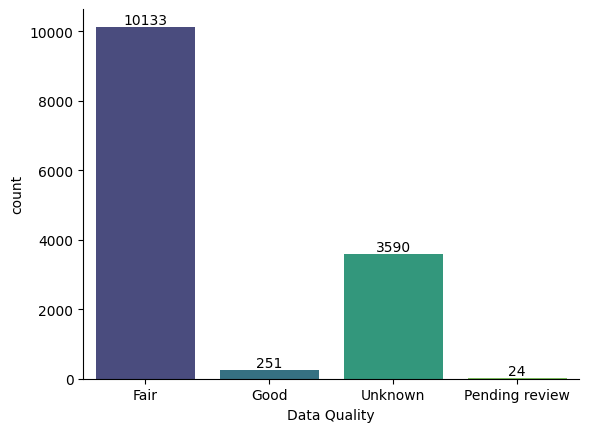

In [101]:
# Data Quality Categories
ax = sns.countplot(data_train, x='Data Quality', palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()

Dari chart diatas, dapat dianalisis bahwa kolom 
kategori "Fair" memilili jumlah data yang jauh lebih tinggi dibandingkan dengan kategori lainnya dengan jumlah 10133, hal ini menunjukan bahwa data dalam dataset ini didominasikan oleh kategori "Fair" dalam hal kualitas.

Kategori "Unknown" menujukkan jumlah kategori yang segnifikan sebesar 3590, ini mengindikasikan bahwa ada sejumlah besar data yang kualitasnya belom atau tidak dapat ditentukan. Kategori Good dan Pending review memiliki jumlah kategori yang kecil, masing masing sebesar 251 dan 24.

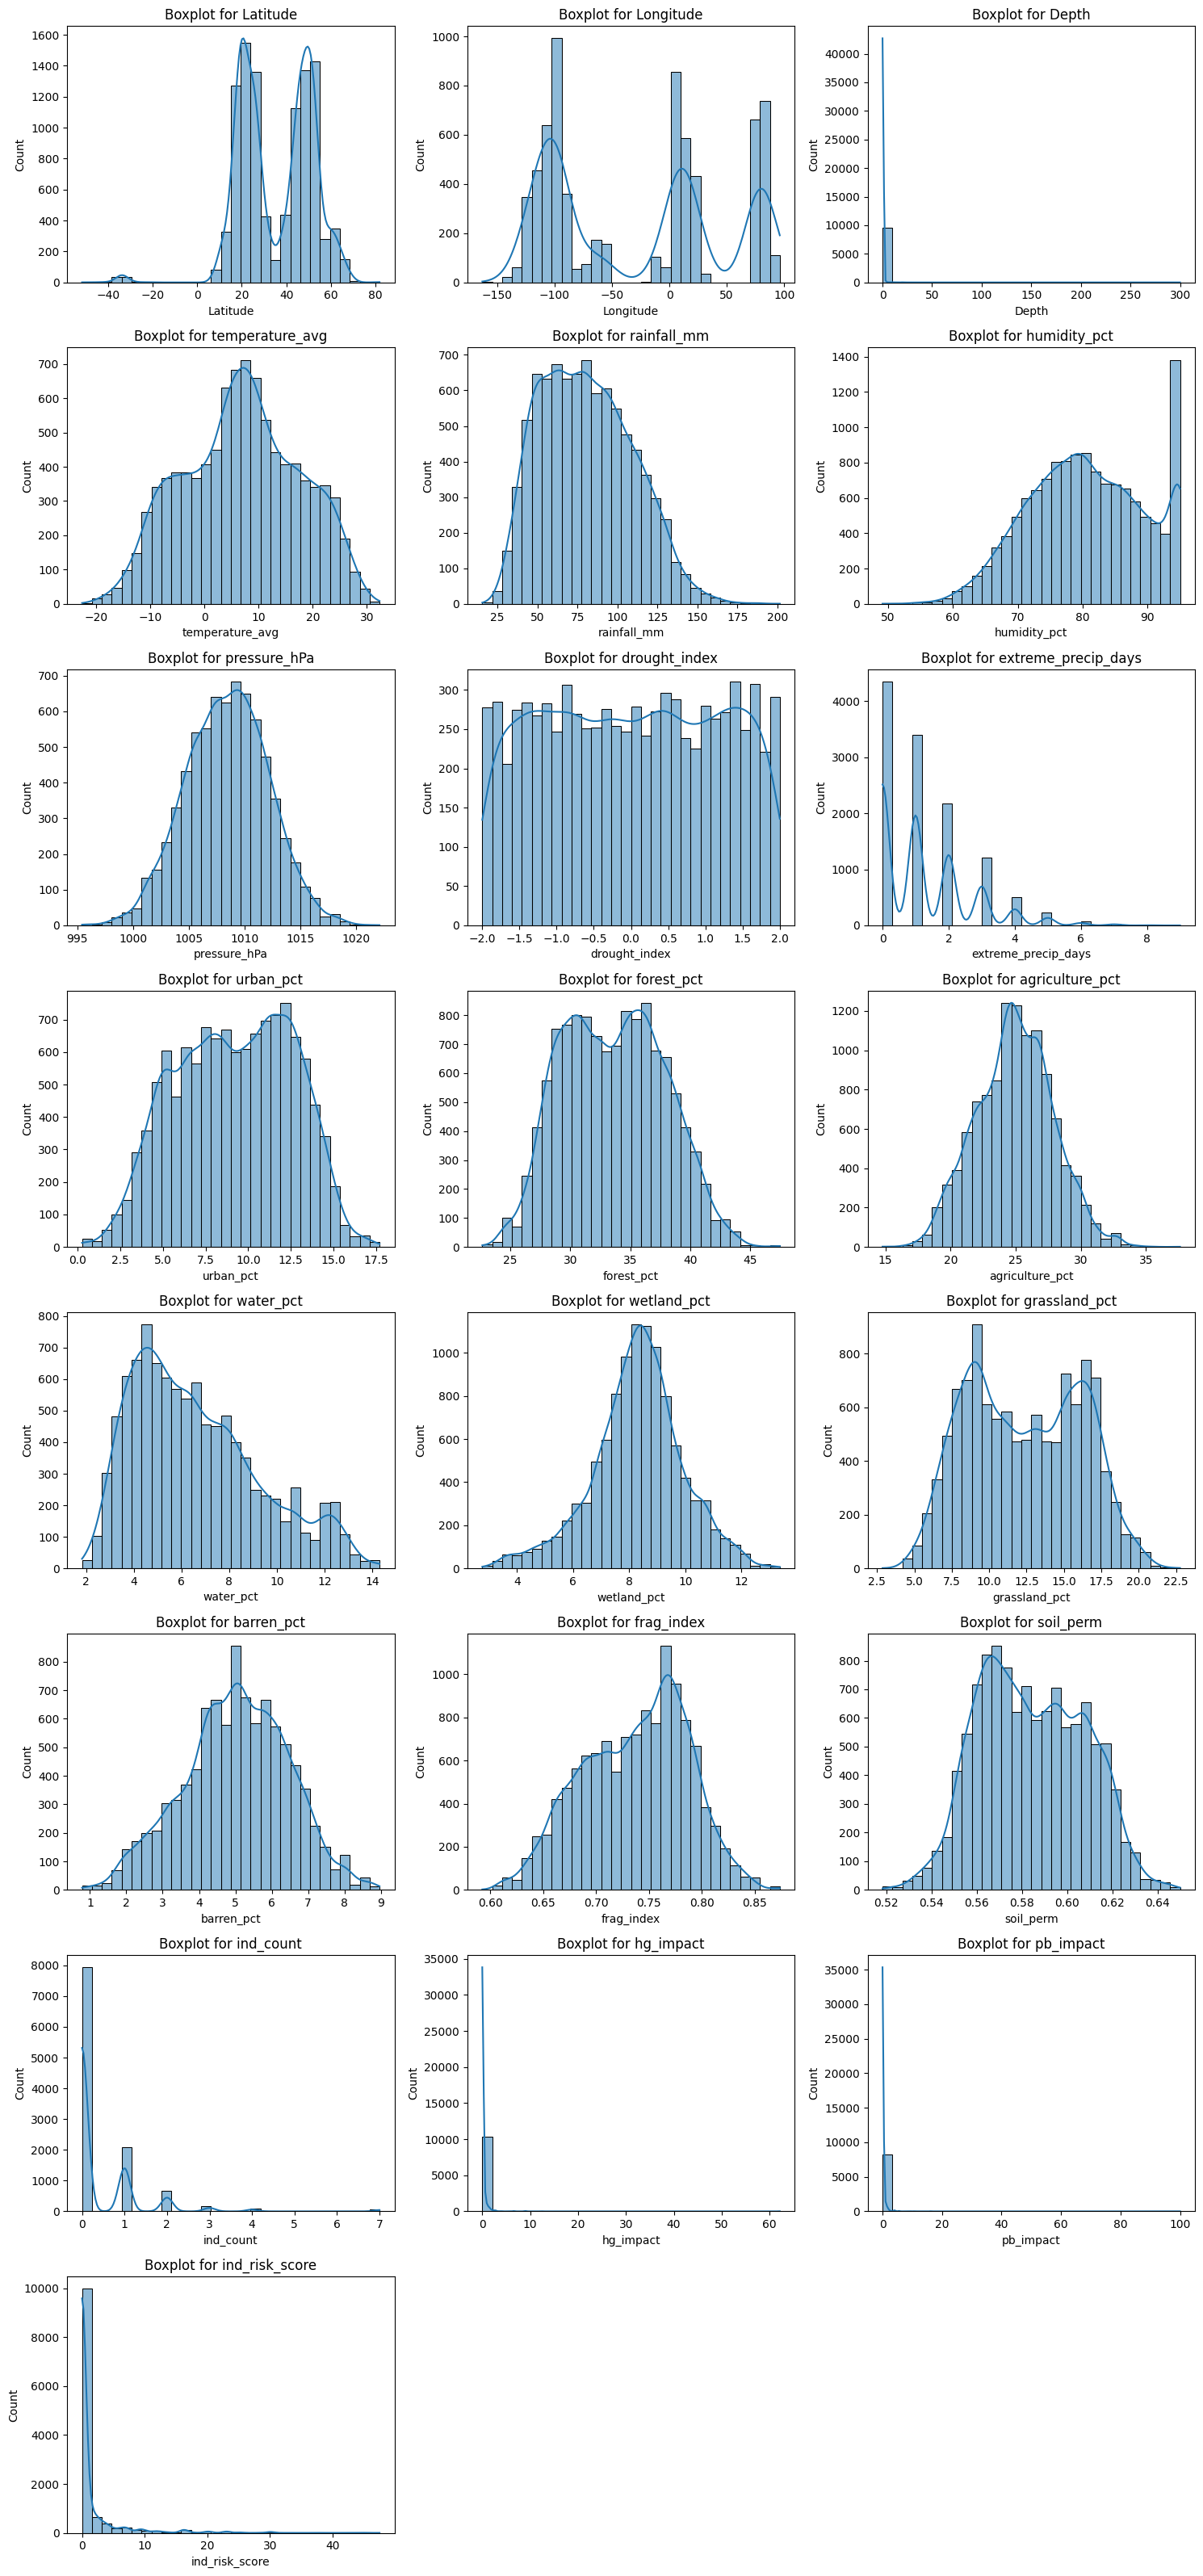

In [102]:
# Visualisai untuk melihat distribusi pada kolom number

numerik = data_train.select_dtypes(include='number').columns

jml_col = len(numerik)
col = 3
baris = (jml_col//col) + (jml_col%col>0)

fig, axs = plt.subplots(baris, col, figsize=(15, baris*4))
axs = axs.flatten()

for idx, col in enumerate(numerik) :
    sns.histplot(data=data_train[col], ax=axs[idx], bins=30, kde=True)
    axs[idx].set_title(f'Boxplot for {col}')


for j in range(idx + 1, len(axs)) :
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

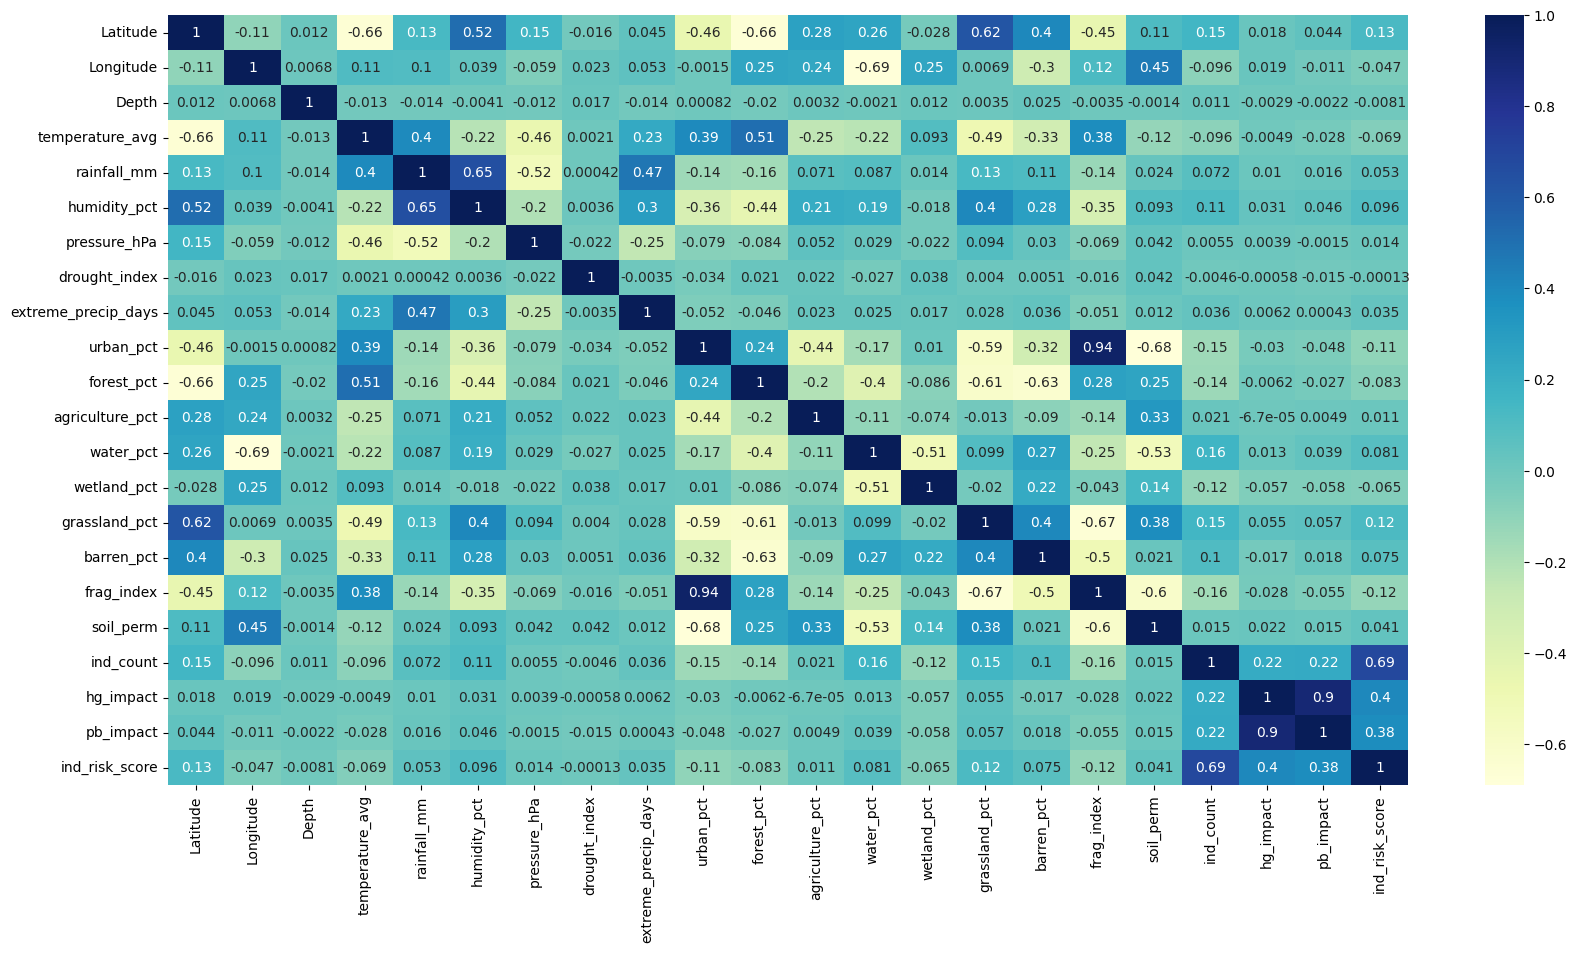

In [103]:
# Mengidentifikasi Korelasi pada data train
data_categorical = data_train.select_dtypes('number')

plt.figure(figsize=(20,10))
sns.heatmap(data=data_categorical.corr(), cmap='YlGnBu', annot=True)

plt.show()

# Data Pre-Processing

### Analysis Missing Values

In [104]:
# Mengidentifikasi mising values
data_train.isnull().sum()

Latitude                 3610
Longitude                7073
Station Code             5360
Depth                    4445
Parameter Code           1697
Analysis Method Code    11597
Value Flags             11828
Data Quality                0
Dataset_Source           6212
temperature_avg          4517
rainfall_mm              5174
humidity_pct              849
pressure_hPa             6814
drought_index            5979
extreme_precip_days      2023
urban_pct                1889
forest_pct               1831
agriculture_pct          2620
water_pct                4017
wetland_pct              3418
grassland_pct            2574
barren_pct               4558
frag_index               1569
soil_perm                2542
ind_count                2974
hg_impact                3535
pb_impact                5667
ind_risk_score           1953
param_category           3924
country_code             4432
time_season               980
value_with_unit          4499
sampling_method          1788
is_referen

In [105]:
# Menampilkan data yang Nan
data_train[data_train.isnull().any(axis=1)]

,Latitude,Longitude,Station Code,Depth,Parameter Code,Analysis Method Code,Value Flags,Data Quality,Dataset_Source,temperature_avg,...,sampling_method,is_referenced_method,water_body_type,analytical_program,pollution_risk,testing_laboratory,validated_results,sampling_weather,regulatory_framework,land_use_impact
0,50.902800,NaN,CAN00062,NaN,OH,VMV_351,NaN,Fair,NaN,NaN,...,NaN,False,Wetland,Provincial Monitoring,Medium,National Water Research Center,False,Snowy,NaN,Agricultural Dominant
1,NaN,NaN,NaN,0.3,NaN,NaN,NaN,Fair,carbon,NaN,...,Composite Sample,True,NaN,NaN,Low,NaN,True,NaN,International Water Quality Standards,Agricultural Dominant
2,46.271170,11.42484,ITA00304,0.0,NaN,APAT3200_2003,<,Fair,mercury,-5.702201,...,Grab Sample,NaN,NaN,NaN,NaN,International Water Quality Lab,True,NaN,International Water Quality Standards,NaN
3,49.458600,-120.50400,CAN00328,0.3,Cs-Tot,VMV_3528,NaN,Fair,caesium,6.250698,...,Composite Sample,False,Reservoir,NaN,NaN,Canadian Analytical Services,True,Rainy,Fisheries Act,Agricultural Dominant
4,49.527900,-115.54920,CAN00204,0.3,Li-Tot,VMV_1919,NaN,Good,lithium,-9.855316,...,Manual Sample,False,River,NaN,Medium,National Water Research Center,True,NaN,Canadian Environmental Protection Act,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13993,42.010000,NaN,NaN,0.0,Cr-Dis,NaN,NaN,Fair,chromium,12.236726,...,Manual Sample,True,Lake,International Water Assessment,Medium,International Water Quality Lab,True,Rainy,International Water Quality Standards,Urban Dominant
13994,26.766389,NaN,IND02371,NaN,O2-Dis-Sat,NaN,NaN,Unknown,dissolved_gas,NaN,...,NaN,False,Stream,International Water Assessment,Medium,International Water Quality Lab,True,NaN,International Water Quality Standards,Forest Dominant
13995,47.851690,13.80288,AUT00260,NaN,O2-Dis-Sat,NaN,NaN,Fair,NaN,14.084927,...,NaN,False,Estuary,NaN,NaN,International Water Quality Lab,NaN,NaN,International Water Quality Standards,Agricultural Dominant
13996,43.570520,NaN,NaN,0.0,NaN,NaN,NaN,Fair,hardness,10.435863,...,Field Measurement,True,NaN,NaN,NaN,NaN,NaN,Cloudy,International Water Quality Standards,Agricultural Dominant


In [106]:
nuerik = data_train.select_dtypes(include='object').columns

for i in nuerik :
    print(f'{i} = ',data_train[i].isnull().sum())

Station Code =  5360
Parameter Code =  1697
Analysis Method Code =  11597
Value Flags =  11828
Data Quality =  0
Dataset_Source =  6212
param_category =  3924
country_code =  4432
time_season =  980
value_with_unit =  4499
sampling_method =  1788
is_referenced_method =  1113
water_body_type =  6634
analytical_program =  6789
pollution_risk =  5798
testing_laboratory =  2577
validated_results =  1340
sampling_weather =  5015
regulatory_framework =  3487
land_use_impact =  1473


In [107]:
# Menghapus kolom yang kurang relevan
data_train = data_train.drop(columns=['Depth','rainfall_mm','pressure_hPa','drought_index','extreme_precip_days',
                                     'pb_impact','Station Code','Analysis Method Code', 'Value Flags',
                                      'Dataset_Source', 'param_category', 'country_code', 'value_with_unit',
                                      'water_body_type','analytical_program', 'pollution_risk','sampling_weather','regulatory_framework'])

In [108]:
nuerik = data_train.select_dtypes(include='number').columns

for i in nuerik :
    print(f'{i} = ',data_train[i].isnull().sum())

Latitude =  3610
Longitude =  7073
temperature_avg =  4517
humidity_pct =  849
urban_pct =  1889
forest_pct =  1831
agriculture_pct =  2620
water_pct =  4017
wetland_pct =  3418
grassland_pct =  2574
barren_pct =  4558
frag_index =  1569
soil_perm =  2542
ind_count =  2974
hg_impact =  3535
ind_risk_score =  1953


In [109]:
nuerik = data_train.select_dtypes(include='number').columns

for i in nuerik :
    data_train[i] = data_train[i].fillna(data_train[i].mean())
    

In [110]:
nuerik = data_train.select_dtypes(include='object').columns

for i in nuerik :
    print(f'{i} = ',data_train[i].isnull().sum())

Parameter Code =  1697
Data Quality =  0
time_season =  980
sampling_method =  1788
is_referenced_method =  1113
testing_laboratory =  2577
validated_results =  1340
land_use_impact =  1473


In [111]:
data_train['time_season'].value_counts()

time_season
2018-02-13 12:00:00 - Winter    13
2020-03-02 00:00:00 - Spring    12
2018-03-21 12:00:00 - Spring    12
2019-06-12 12:00:00 - Summer    11
2014-07-17 12:00:00 - Summer    10
                                ..
2009-04-20 12:00:00 - Spring     1
2002-11-13 10:30:00 - Fall       1
2012-06-11 12:00:00 - Summer     1
1984-03-15 12:15:00 - Spring     1
1996-11-27 00:00:00 - Fall       1
Name: count, Length: 7618, dtype: int64

In [112]:
# Mengatasi mising values

nuerik = data_train.select_dtypes(include='object').columns

for i in nuerik :
    data_train[i] = data_train[i].fillna(method='pad')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\3226667121.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_train[i] = data_train[i].fillna(method='pad')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\3226667121.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_train[i] = data_train[i].fillna(method='pad')


Mengatasi mising valuaes dengan menggunakan metode Multiple Imputation dengan algoritma K-Nearest Neighbors (KNN) untuk memastikan proses kinerja model baik nantinya.

In [113]:
# Cek data duplikat
data_train.duplicated().sum()

np.int64(0)

### Analysis Outliers

Ourliers atau bisa disebut juga sebagai data pencilan merupakan data yang berada jauh dari titik data lainnya dalam suatu dataset. Dalam analisis ini, outliers dapat mempengaruhi analisis statistik dan analisis prediktif yang mengakibatkan estimasi yang tidak akurat.

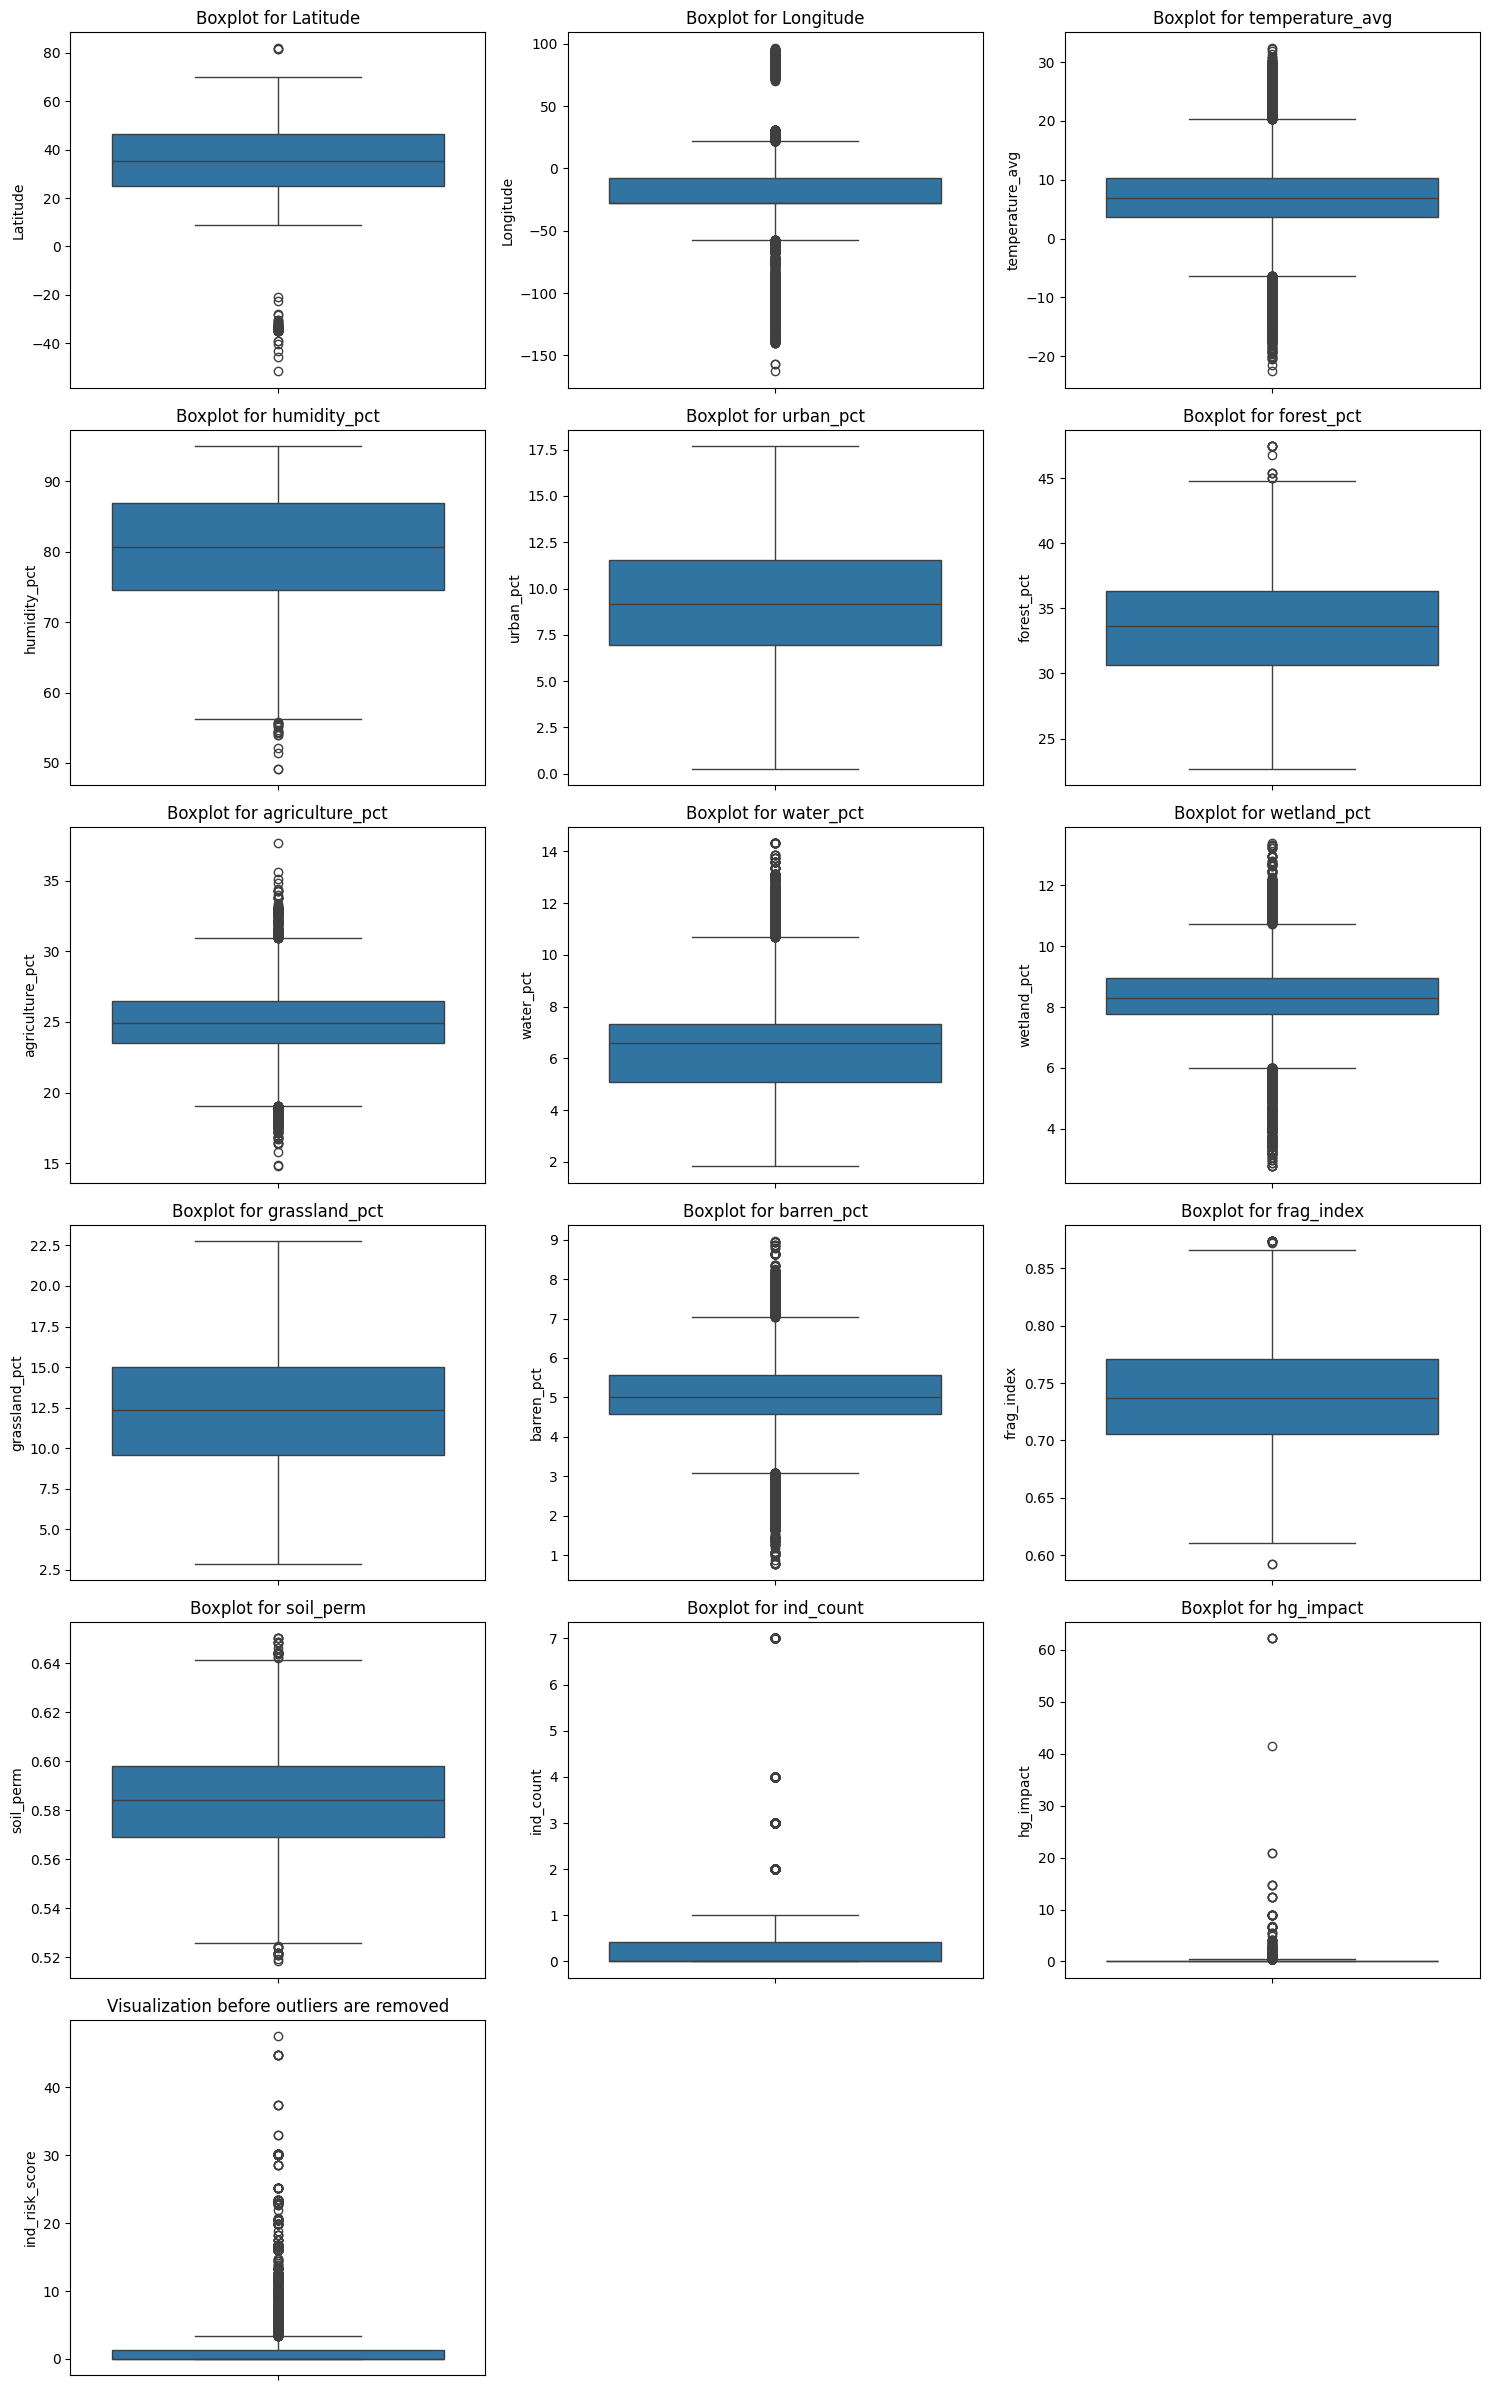

In [114]:
# Mengidentifikasi Outliers
col_numerik = data_train.select_dtypes(include='number').columns

jml_col = len(col_numerik)
col = 3
baris = (jml_col// col) + (jml_col% col > 0)

fig, axs = plt.subplots(baris, col, figsize=(15, baris*4))
axs = axs.flatten()

for idx, col in enumerate(col_numerik):
    sns.boxplot(data=data_train[col], ax=axs[idx])
    axs[idx].set_title(f'Boxplot for {col}')

for j in range(idx + 1, len(axs)) :
    fig.delaxes(axs[j])

plt.tight_layout()
plt.title('Visualization before outliers are removed')
plt.show()

Pada visualisasi diatas menggunkan boxplot, dapat diketahui ada beberapa kolom yang mengalami outliers pada kolomnya. Hal ini harus perlu di tindak lanjut, cara yang efektik dalam penanganan outliers diatas dengam menggunkan metode interquartile range (IQR). interquartile range (IQR) merupakan metode dalam statistik yang untuk memahami sebaran data dan mendektesi outliers.

In [115]:
# Mengatasi Outliers dengan metode IQR
hapus_outliers = data_train.copy()
for i in col_numerik :
    Q1 = data_train[i].quantile(0.25)
    Q3 = data_train[i].quantile(0.75)
    IQR = Q3 - Q1

    batas_bawah = Q1 - 1.5 * IQR
    batas_atas =  Q3 + 1.5 * IQR

    hapus_outliers = hapus_outliers[(hapus_outliers[i] >= batas_bawah) & (hapus_outliers[i] <= batas_atas)]

data_train = hapus_outliers

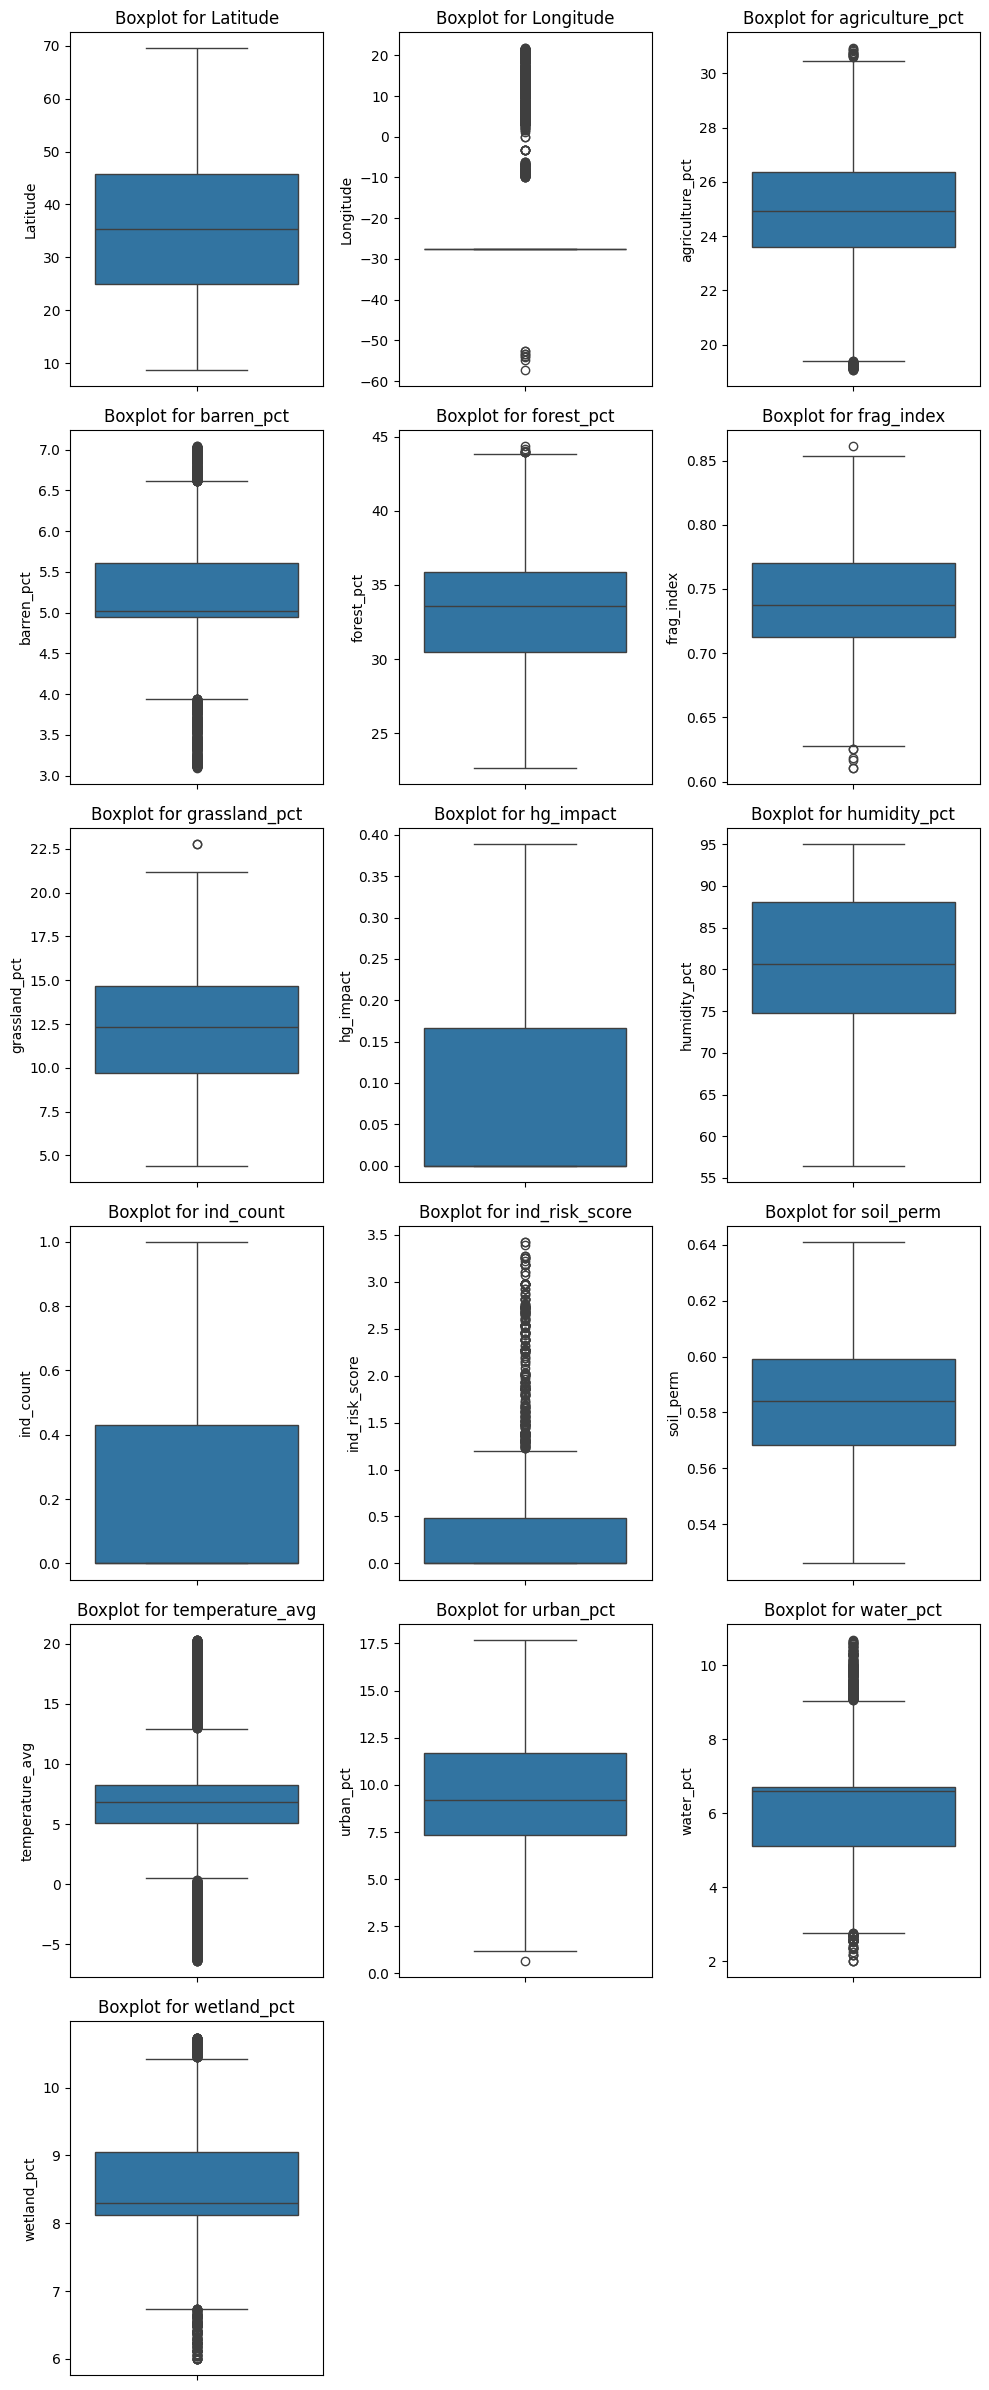

In [116]:
setelah_hapus_outliers = data_train.select_dtypes(include='number').columns.difference(['Data Quality'])

# Mengatur suplotsnya
k = len(setelah_hapus_outliers)
kolom = 3
baris = (k // 3 ) + ( k % kolom > 0)

fig, axs = plt.subplots(baris, kolom, figsize=(10, baris*4))
axs = axs.flatten()

for idx, col in enumerate(setelah_hapus_outliers) :
    sns.boxplot(data=data_train[col], ax=axs[idx])
    axs[idx].set_title(f'Boxplot for {col}')

# Mengahapus subplot yang tidak terpakai jika ada
for j in range(idx + 1, len(axs)) :
    fig.delaxes(axs[j])

# Mengatur tata letak
plt.tight_layout()
plt.show()



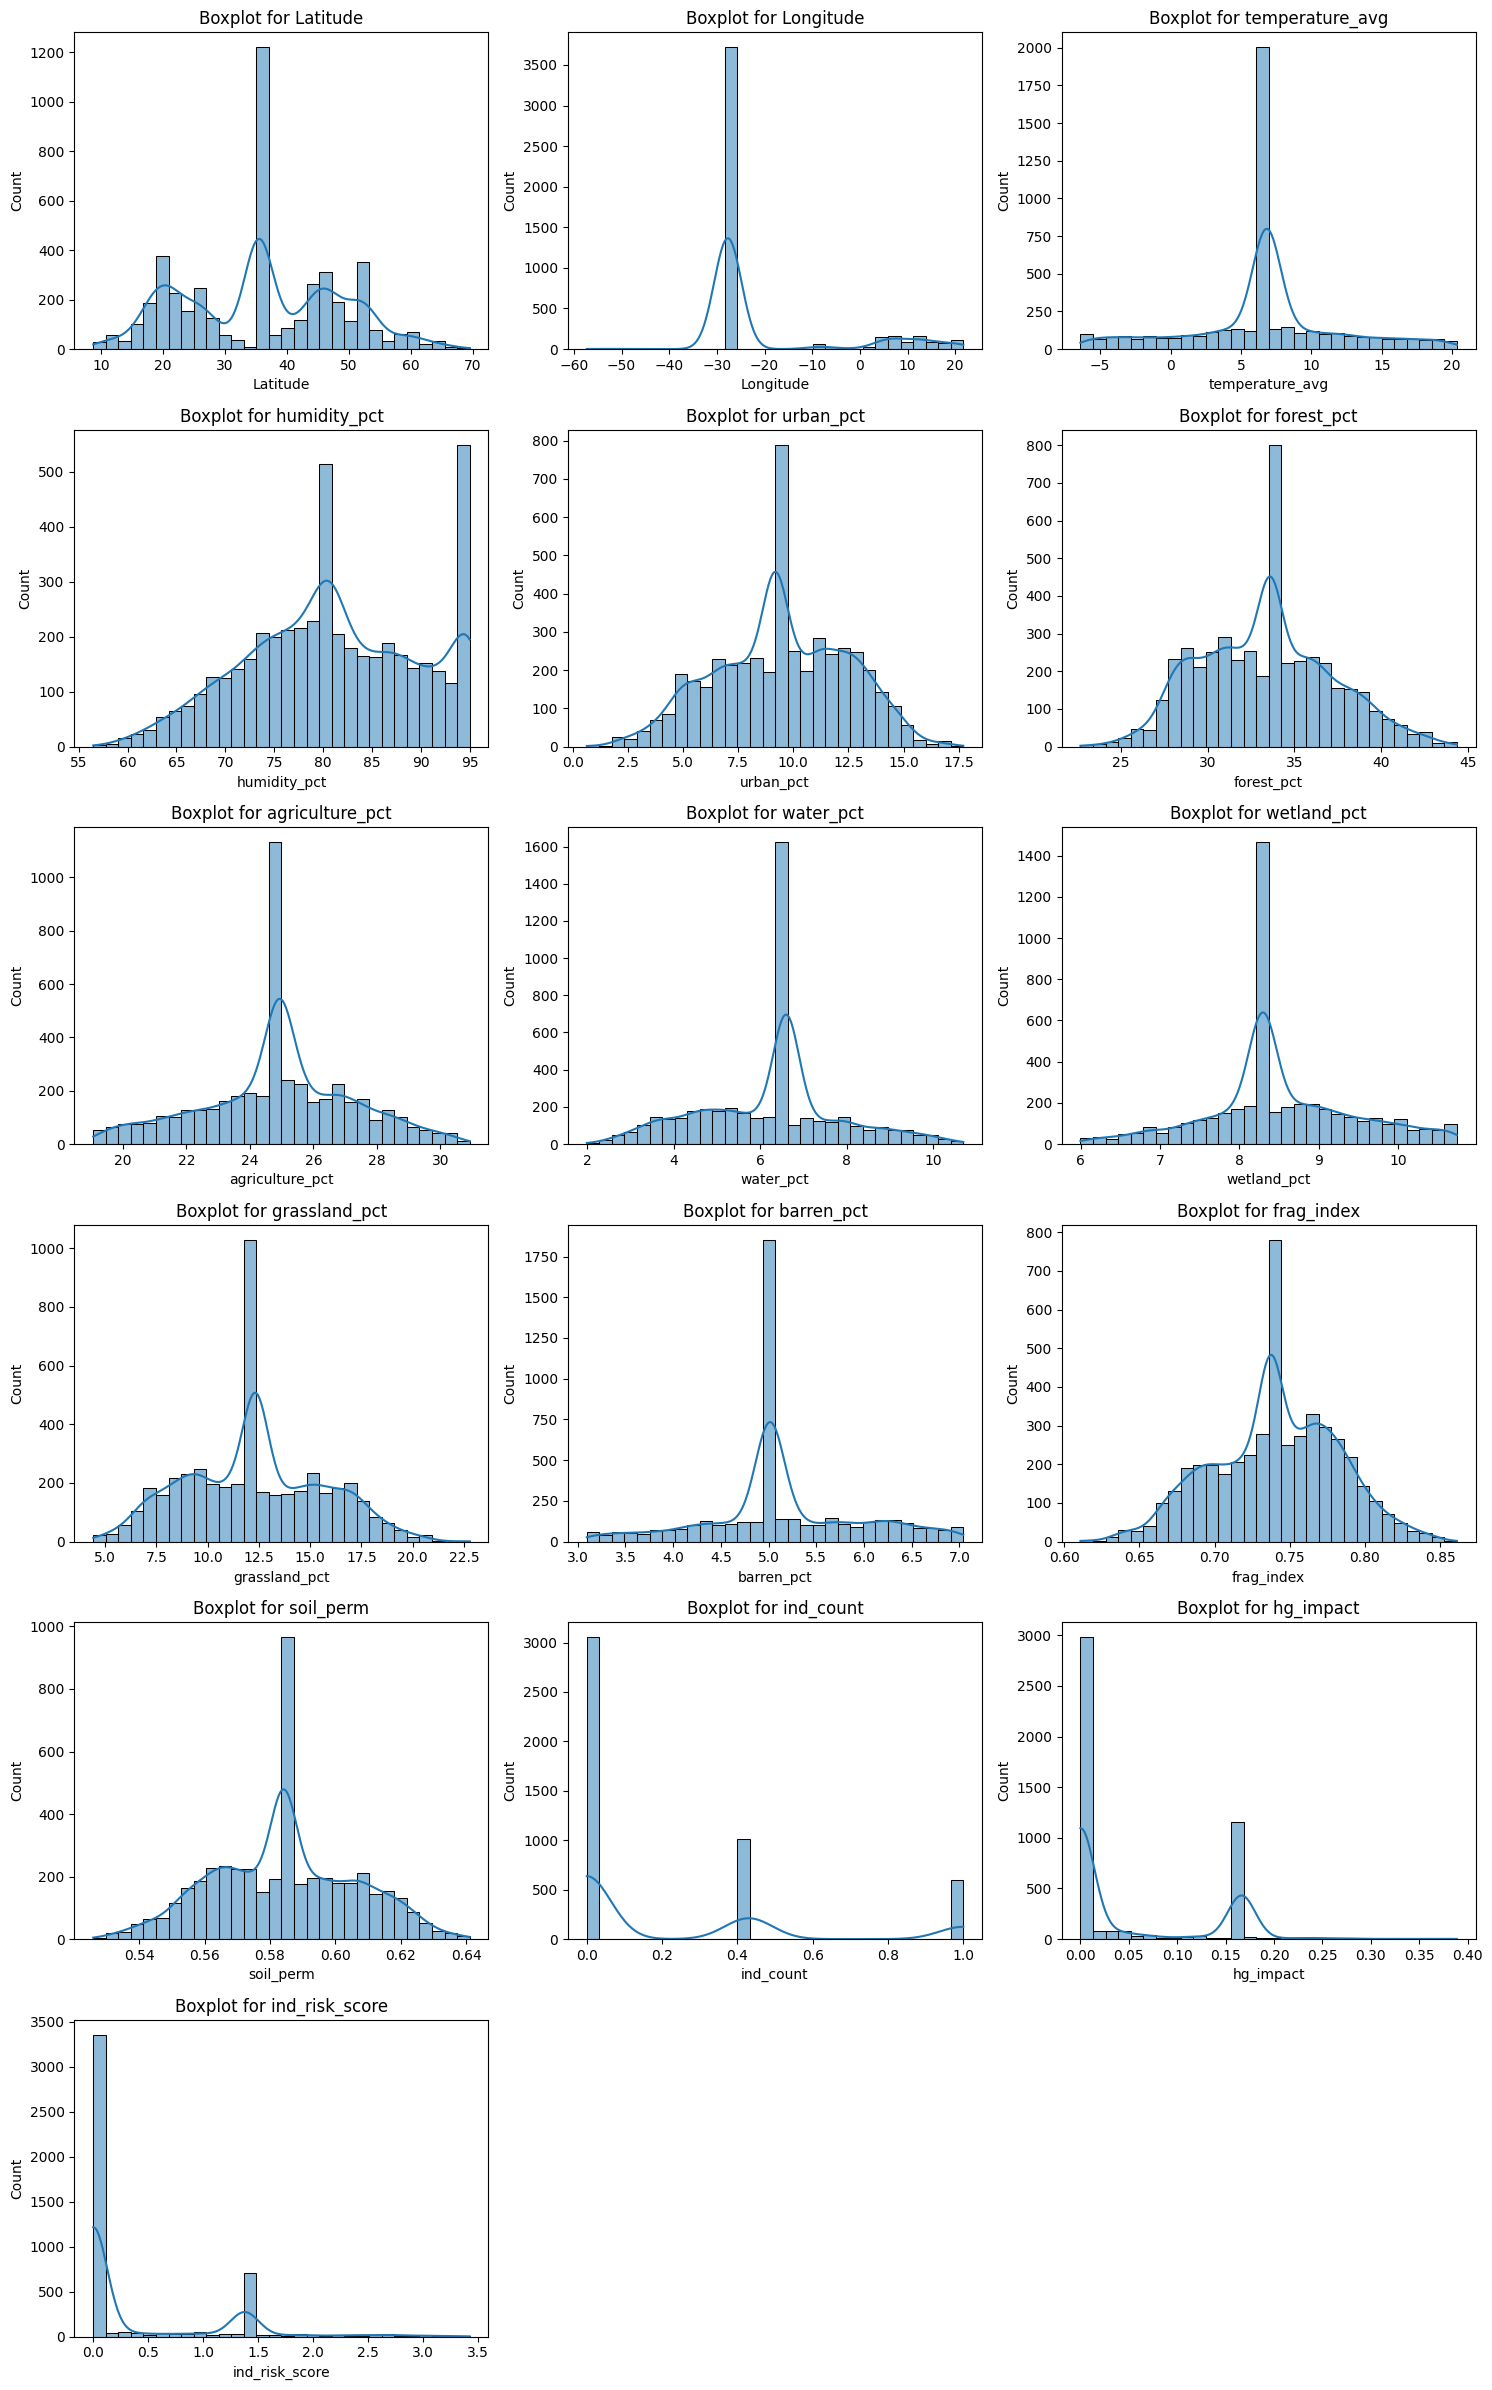

In [117]:
# Distrbusi
numerik = data_train.select_dtypes(include='number').columns

jml_col = len(numerik)
col = 3
baris = (jml_col//col) + (jml_col%col>0)

fig, axs = plt.subplots(baris, col, figsize=(15, baris*4))
axs = axs.flatten()

for idx, col in enumerate(numerik) :
    sns.histplot(data=data_train[col], ax=axs[idx], bins=30, kde=True)
    axs[idx].set_title(f'Boxplot for {col}')


for j in range(idx + 1, len(axs)) :
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

### Label Encoding Kategorikal

Melakukan proses label encoding pada data train untuk mengkategorikan nilai nilai pada kolom yang bersifat kategorikal yang bertipe data object menjadi format numerik untuk memastikan proses machine learning bisa bekerja dengan baik.

In [118]:
encoder = LabelEncoder()

categorical_columns = data_train.select_dtypes(include='object').columns
for col in  categorical_columns :
    data_train[col] = data_train[col].astype(str)
    data_train[col] = encoder.fit_transform(data_train[col])

data_train.head()

,Latitude,Longitude,Parameter Code,Data Quality,temperature_avg,humidity_pct,urban_pct,forest_pct,agriculture_pct,water_pct,...,soil_perm,ind_count,hg_impact,ind_risk_score,time_season,sampling_method,is_referenced_method,testing_laboratory,validated_results,land_use_impact
1,35.436061,-27.693376,93,0,6.824907,85.981444,7.383620,27.776921,27.307877,6.608126,...,0.596833,0.000000,0.000000,0.000000,2124,1,True,7,True,0
2,46.271170,11.424840,93,0,-5.702201,85.398487,9.247551,28.228460,26.985046,4.872352,...,0.584229,0.430062,0.230421,2.603596,1106,3,True,5,True,0
5,49.089700,-27.693376,57,0,0.913690,92.083034,9.185385,27.484339,26.138245,6.608126,...,0.584229,1.000000,0.166358,1.489200,768,4,False,7,True,3
8,61.098900,-27.693376,45,0,-4.285296,92.182886,2.839884,32.539575,26.728638,9.167202,...,0.617378,0.000000,0.000000,0.000000,999,1,False,3,False,1
16,35.436061,-27.693376,67,3,15.217575,80.736423,13.089772,40.582014,20.931050,6.608126,...,0.585795,0.430062,0.000000,0.000000,3163,2,False,5,True,0


# Data Modeling & Evalution

### Data Splitting

Data Splitting merupakan proses membagi data menjadi dua bagian yaitu data latih dan data uji

In [119]:
# Proses memisahkan fitur X dan y
X = data_train.drop('Data Quality', axis=1)
y = data_train['Data Quality']

In [120]:
# Membagi data train menjan 70% data latih dan 30% data uji
X_train, X_test, y_train, y_test =  train_test_split(X,y, test_size=0.3, random_state=42)


### Membangan Model Klasifikasi


- Algoritma Machine Learning

Dalam analisis ini, saya menggunakan tiga algoritma utama machine learning yaitu Random Forest, Naive Bayes dan Decision Tree untuk melakukan klasifikasi. Ketiga algortima tersebut akan dilatih dengan data latih, perlu diketahui juga algortima atau model tersebut memiliki cara kerja yang berbeda dan kelebihan tersendiri.

In [121]:
# Melatih model Random Forest
random_forest = RandomForestClassifier(random_state=69).fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
print('Random Forest Classification Report:\n', classification_report(y_test,random_forest_pred, digits=5))


Random Forest Classification Report:
               precision    recall  f1-score   support

           0    0.94942   0.99258   0.97052      1078
           1    1.00000   0.12500   0.22222         8
           2    0.00000   0.00000   0.00000         3
           3    0.97037   0.84790   0.90501       309

    accuracy                        0.95351      1398
   macro avg    0.72995   0.49137   0.52444      1398
weighted avg    0.95231   0.95351   0.94968      1398



c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Deon Harefa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _wa

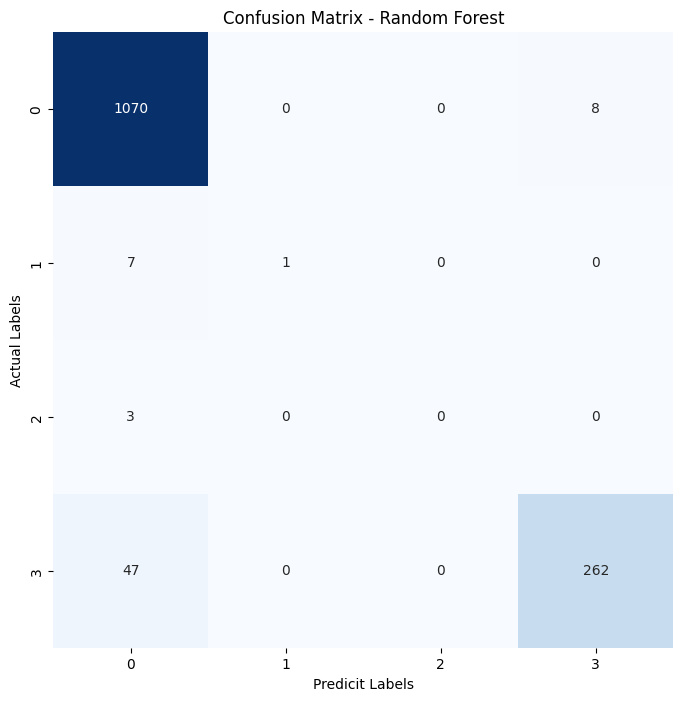

In [122]:
# --------------------------------
# Random Forest - Confusion Matrix
# ---------------------------------
unique_labels = sorted(set(y))


random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_pred)
plt.figure(figsize=(8,8))
sns.heatmap(random_forest_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=unique_labels, 
            yticklabels=unique_labels)

plt.xlabel('Predicit Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Random Forest')
print('\n')




In [123]:
# Melatih model Naive Bayes
naive_bayes = GaussianNB().fit(X_train, y_train)
naive_bayes_pred = naive_bayes.predict(X_test)
print('Naive Bayes Classification Report:\n', classification_report(y_test,naive_bayes_pred, digits=5))

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0    0.99107   0.51484   0.67766      1078
           1    0.06306   0.87500   0.11765         8
           2    0.00000   0.00000   0.00000         3
           3    0.43058   0.99353   0.60078       309

    accuracy                        0.62160      1398
   macro avg    0.37118   0.59584   0.34902      1398
weighted avg    0.85975   0.62160   0.65601      1398



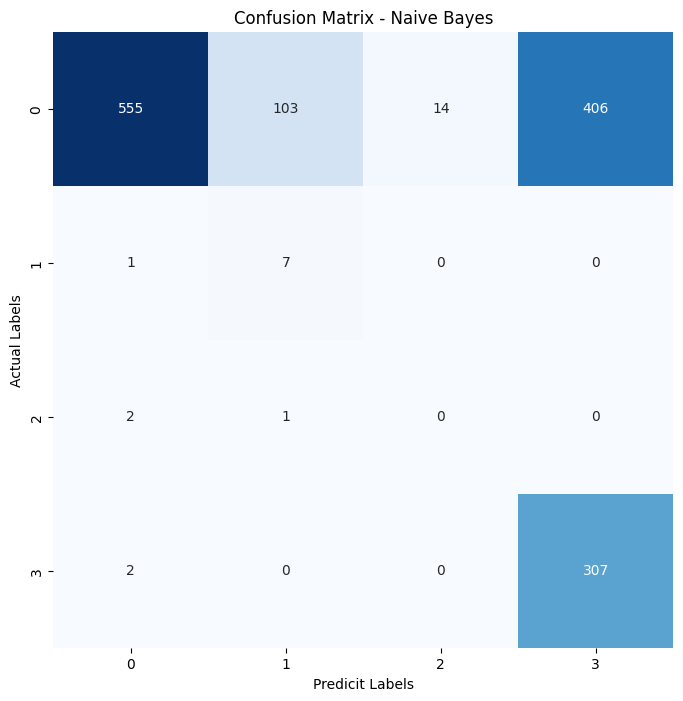

In [124]:
# --------------------------------
# Naive Bayes - Confusion Matrix
# ---------------------------------
unique_labels = sorted(set(y))


naive_bayes_confusion_matrix = confusion_matrix(y_test, naive_bayes_pred)
plt.figure(figsize=(8,8))
sns.heatmap(naive_bayes_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=unique_labels, 
            yticklabels=unique_labels)

plt.xlabel('Predicit Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Naive Bayes')
print('\n')




In [125]:
# Melatih model Decision Tree
model_decision_tree = DecisionTreeClassifier()
decision_tree = model_decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
print('Decision Tree Classification Report:\n', classification_report(y_test,decision_tree_pred,digits=5))

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0    0.94112   0.93414   0.93762      1078
           1    0.25000   0.12500   0.16667         8
           2    0.00000   0.00000   0.00000         3
           3    0.81529   0.82848   0.82183       309

    accuracy                        0.90415      1398
   macro avg    0.50160   0.47190   0.48153      1398
weighted avg    0.90733   0.90415   0.90560      1398



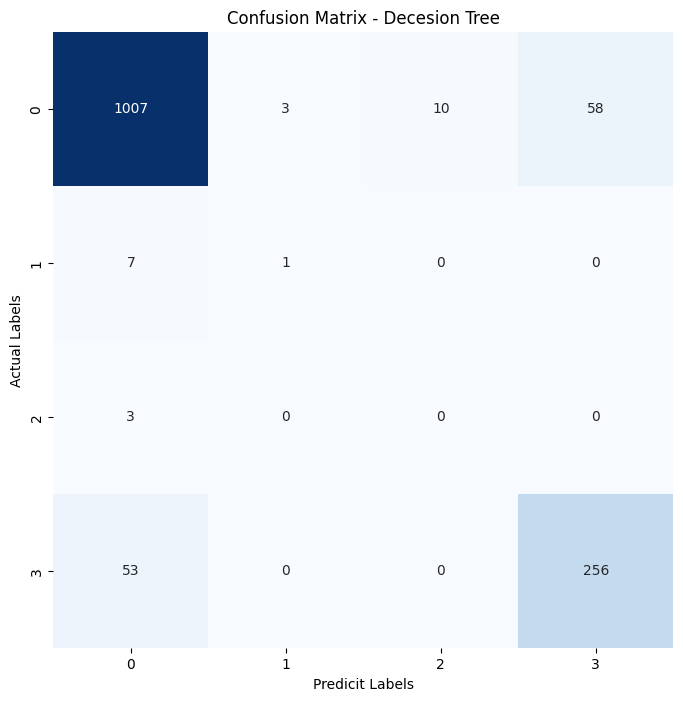

In [126]:
# --------------------------------
# Decision Tree - Confusion Matrix
# ---------------------------------
unique_labels = sorted(set(y))


decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_pred)
plt.figure(figsize=(8,8))
sns.heatmap(decision_tree_confusion_matrix, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=unique_labels, 
            yticklabels=unique_labels)

plt.xlabel('Predicit Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix - Decesion Tree')
print('\n')




### Hasil Evaluasi Model

Berdasarkan hasil evaluasi menggunakan model Random Forest, Naive Bayes dan Decesion Tree dapat disimpulkan bahwa : 

1. Random Forest

    - Random Forest mencapai akurasi sebesar 95,351% pada data uji

    - Random Forest memiliki hasil precision, recall, dan F1-Score berdasarkan weighted average yaitu sekitar 0,949

    - Confusion matrix memperlihatkan performa yang baik, meskipun masih terdapat sedikit kesalahan prediksi, terutama di kelas 1 dan 3.

2. Naive Bayes

    - Naive Bayes mencapai akurasi sebesar 62,16% pada data uji

    - Naive Bayes memiliki hasil precision, recall, dan F1-Score berdasarakan (weighted average) yaitu sekitar 0,712

    - Confusion matrix memperlihatkan performa yang baik, meskipun masih terdapat sedikit kesalahan prediksi, terutama di kelas 0 .

3. Decision Tree

    - Decision Tree mencapai akurasi sebesar 90,07% pada data uji

    - Decison Tree memiliki hasil precision, recall dan F1-Score berdasarkan (weighted average) yaitu sekitar 0,908

    - Confusion matrix memperlihatkan performa yang baik, meskipun masih terdapat sedikit kesalahan prediksi, terutama di kelas 0.


Berdasarkan hasil analisis kinerja model berserta dengan akurasi yang dihasilkan dapat diketahui bahwa Random Forest menunjukkan kinerja yang lebih unggul dibandingkan dengan model Naive Bayes & Decision Tree. Hal ini membuktikan bahwa model Random Forest menjadi pilihan terbaik dalam mengklasifikasikan data dengan akurat.

-----

----

----

----

# Test Model

Melakukan test model dengan menggunakan data test yang ada

In [127]:
# Membaca file data test
data_test = pd.read_csv('test.csv')
data_test

,Latitude,Longitude,Station Code,Depth,Parameter Code,Analysis Method Code,Value Flags,Dataset_Source,temperature_avg,rainfall_mm,...,is_referenced_method,water_body_type,analytical_program,pollution_risk,testing_laboratory,validated_results,sampling_weather,regulatory_framework,land_use_impact,id
0,NaN,NaN,NaN,NaN,Pb-Dis,NaN,NaN,NaN,7.638085,142.897101,...,True,NaN,International Water Assessment,High,International Water Quality Lab,True,Clear,International Water Quality Standards,Mixed Land Use,0
1,NaN,NaN,ROU00035,0.3,H-T,NaN,NaN,NaN,-1.347859,51.029480,...,False,River,International Water Assessment,Low,International Water Quality Lab,NaN,Cloudy,International Water Quality Standards,Urban Dominant,1
2,21.967530,NaN,NaN,NaN,Pb-Tot,NaN,<,NaN,16.907207,82.401543,...,False,NaN,NaN,Medium,International Water Quality Lab,True,NaN,International Water Quality Standards,Urban Dominant,2
3,NaN,83.274722,IND02411,NaN,EC,NaN,NaN,NaN,NaN,79.396807,...,True,NaN,NaN,Low,International Water Quality Lab,True,Clear,International Water Quality Standards,Agricultural Dominant,3
4,19.535278,74.833611,IND02093,0.3,H-T,NaN,NaN,NaN,6.339215,52.887421,...,NaN,NaN,NaN,Low,International Water Quality Lab,True,NaN,International Water Quality Standards,Urban Dominant,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,35.258056,NaN,USA00101,0.3,O2-Dis,NaN,NaN,dissolved_gas,3.014583,37.010599,...,False,Groundwater,NaN,Low,International Water Quality Lab,True,NaN,NaN,Mixed Land Use,5995
5996,50.885600,NaN,CAN00202,NaN,DOC,VMV_2695,<,carbon,NaN,55.840080,...,True,River,Canadian Water Quality Monitoring,NaN,Environment Canada Lab,True,NaN,NaN,Urban Dominant,5996
5997,27.254728,78.023364,IND02385,NaN,NaN,NaN,NaN,NaN,0.721897,NaN,...,False,NaN,International Water Assessment,Low,NaN,True,NaN,International Water Quality Standards,Urban Dominant,5997
5998,28.848040,NaN,MEX03417,0.3,OH,NaN,NaN,NaN,3.894736,NaN,...,False,Groundwater,International Water Assessment,Medium,International Water Quality Lab,True,NaN,NaN,NaN,5998


In [128]:
# Info data test
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Latitude              4452 non-null   float64
 1   Longitude             2990 non-null   float64
 2   Station Code          3773 non-null   object 
 3   Depth                 4058 non-null   float64
 4   Parameter Code        5294 non-null   object 
 5   Analysis Method Code  1041 non-null   object 
 6   Value Flags           981 non-null    object 
 7   Dataset_Source        3418 non-null   object 
 8   temperature_avg       4108 non-null   float64
 9   rainfall_mm           3803 non-null   float64
 10  humidity_pct          5664 non-null   float64
 11  pressure_hPa          3086 non-null   float64
 12  drought_index         3488 non-null   float64
 13  extreme_precip_days   5113 non-null   float64
 14  urban_pct             5253 non-null   float64
 15  forest_pct           

In [129]:
# Info jumlah baris dan kolom 
data_test.shape

(6000, 42)

### Cleaning Data

In [130]:
# Menghapus kolom yang kurang relevan
data_test = data_test.drop(columns=['Depth','rainfall_mm','pressure_hPa','drought_index','extreme_precip_days',
                                     'pb_impact','Station Code','Analysis Method Code', 'Value Flags',
                                      'Dataset_Source', 'param_category', 'country_code', 'value_with_unit',
                                      'water_body_type','analytical_program', 'pollution_risk','sampling_weather','regulatory_framework'])

In [131]:
# Mengidentifikasi mising values
data_test.isnull().sum()

Latitude                1548
Longitude               3010
Parameter Code           706
temperature_avg         1892
humidity_pct             336
urban_pct                747
forest_pct               819
agriculture_pct         1117
water_pct               1705
wetland_pct             1469
grassland_pct           1046
barren_pct              1948
frag_index               686
soil_perm               1086
ind_count               1322
hg_impact               1569
ind_risk_score           843
time_season              437
sampling_method          746
is_referenced_method     472
testing_laboratory      1164
validated_results        538
land_use_impact          625
id                         0
dtype: int64

In [132]:
nuerik = data_test.select_dtypes(include='number').columns

for x in nuerik :
     data_test[x] = data_test[x].fillna(data_test[x].mean())

In [133]:
# Mengatasi mising values

nuerik = data_test.select_dtypes(include='object').columns

for i in nuerik :
    data_test[i] = data_test[i].fillna(method='pad')

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\3863518585.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_test[i] = data_test[i].fillna(method='pad')
C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\3863518585.py:6: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test[i] = data_test[i].fillna(method='pad')


In [134]:
nuerik = data_test.select_dtypes(include='number').columns

for i in nuerik :
    print(f'{i} = ',data_test[i].isnull().sum())

Latitude =  0
Longitude =  0
temperature_avg =  0
humidity_pct =  0
urban_pct =  0
forest_pct =  0
agriculture_pct =  0
water_pct =  0
wetland_pct =  0
grassland_pct =  0
barren_pct =  0
frag_index =  0
soil_perm =  0
ind_count =  0
hg_impact =  0
ind_risk_score =  0
id =  0


### Label Data Kategorikal

Menggunakan LabelEncoder untuk proses label encoding data kategorikal

In [135]:
encoder = LabelEncoder()

categorical_columns = data_test.select_dtypes(include='object').columns
for col in  categorical_columns :
    data_test[col] = data_test[col].astype(str)
    data_test[col] = encoder.fit_transform(data_test[col])

data_test.head()

,Latitude,Longitude,Parameter Code,temperature_avg,humidity_pct,urban_pct,forest_pct,agriculture_pct,water_pct,wetland_pct,...,ind_count,hg_impact,ind_risk_score,time_season,sampling_method,is_referenced_method,testing_laboratory,validated_results,land_use_impact,id
0,35.309142,-29.913406,104,7.638085,95.000000,7.157315,27.631679,24.998396,5.648436,8.271665,...,0.0,0.000000,0.000000,3451,3,True,5,True,2,0
1,35.309142,-29.913406,74,-1.347859,71.291741,9.141972,28.105486,24.998396,9.103573,5.702474,...,0.0,0.000000,0.000000,1911,0,False,5,True,3,1
2,21.967530,-29.913406,106,16.907207,71.447583,9.141972,34.429576,21.705035,9.465267,7.246239,...,0.0,0.000000,0.000000,3149,4,False,5,True,3,2
3,35.309142,83.274722,59,7.131712,65.556748,11.328300,38.399268,24.998396,3.068677,8.599693,...,1.0,0.047625,2.675262,1054,4,True,5,True,0,3
4,19.535278,74.833611,74,6.339215,75.978720,6.331446,33.714608,23.194579,6.632132,7.503180,...,0.0,0.000000,0.000000,2985,0,True,5,True,3,4


### Proses Model

Melakukan proses prekdiksi menggunakan algoritma Random Forest yang telah dilatih sebelumnya dengan data latih.

In [136]:
# Melakukan prediksi 
data_pred = data_test.drop(columns='id')
Prediksi = random_forest.predict(data_pred)
print('Data Quanty = ', Prediksi)

Data Quanty =  [0 0 3 ... 3 0 0]


### Membuat dataframe Baru

In [137]:
# Menggabungkan data
new_data = pd.DataFrame(data=data_test, columns=data_test.columns)
new_data['Data Quality'] = Prediksi
new_data

,Latitude,Longitude,Parameter Code,temperature_avg,humidity_pct,urban_pct,forest_pct,agriculture_pct,water_pct,wetland_pct,...,hg_impact,ind_risk_score,time_season,sampling_method,is_referenced_method,testing_laboratory,validated_results,land_use_impact,id,Data Quality
0,35.309142,-29.913406,104,7.638085,95.000000,7.157315,27.631679,24.998396,5.648436,8.271665,...,0.000000,0.000000,3451,3,True,5,True,2,0,0
1,35.309142,-29.913406,74,-1.347859,71.291741,9.141972,28.105486,24.998396,9.103573,5.702474,...,0.000000,0.000000,1911,0,False,5,True,3,1,0
2,21.967530,-29.913406,106,16.907207,71.447583,9.141972,34.429576,21.705035,9.465267,7.246239,...,0.000000,0.000000,3149,4,False,5,True,3,2,3
3,35.309142,83.274722,59,7.131712,65.556748,11.328300,38.399268,24.998396,3.068677,8.599693,...,0.047625,2.675262,1054,4,True,5,True,0,3,3
4,19.535278,74.833611,74,6.339215,75.978720,6.331446,33.714608,23.194579,6.632132,7.503180,...,0.000000,0.000000,2985,0,True,5,True,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,35.258056,-29.913406,100,3.014583,73.194847,9.699340,32.719208,31.419446,3.711810,8.838105,...,0.000000,0.000000,1611,1,False,5,True,2,5995,0
5996,50.885600,-29.913406,58,7.131712,71.524930,5.117770,28.017649,24.244217,6.632132,8.271665,...,0.000000,0.000000,1611,2,True,3,True,3,5996,0
5997,27.254728,78.023364,58,0.721897,72.656007,8.498651,38.199367,28.296390,5.189104,8.980189,...,0.161132,0.866602,111,4,False,3,True,3,5997,3
5998,28.848040,-29.913406,102,3.894736,76.124950,7.459705,34.050830,24.489674,6.632132,8.271665,...,0.000000,0.000000,1923,4,False,5,True,3,5998,0


In [138]:
new_data = new_data[['id', 'Data Quality']]
new_data

,id,Data Quality
0,0,0
1,1,0
2,2,3
3,3,3
4,4,0
...,...,...
5995,5995,0
5996,5996,0
5997,5997,3
5998,5998,0


In [139]:
new_data['Data Quality'] = new_data['Data Quality'].replace({
    0 : 'Fair',
    1 : 'Good',
    2 : 'Pending review',
    3 : 'Unknown'
})

new_data.head()

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\2048561835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data['Data Quality'] = new_data['Data Quality'].replace({


,id,Data Quality
0,0,Fair
1,1,Fair
2,2,Unknown
3,3,Unknown
4,4,Fair


In [140]:
new_data['Data Quality'].value_counts()

Data Quality
Fair       4135
Unknown    1832
Good         33
Name: count, dtype: int64

### Visualisasi Hasil

C:\Users\Deon Harefa\AppData\Local\Temp\ipykernel_17404\4294426224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(new_data, x='Data Quality', palette='viridis')


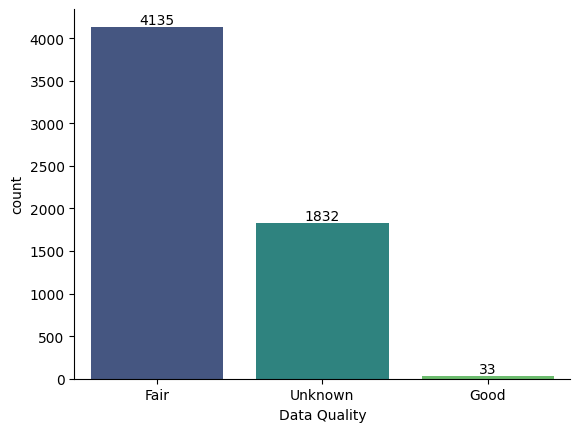

In [141]:
# Data Quality Categories
ax = sns.countplot(new_data, x='Data Quality', palette='viridis')
for i in ax.containers:
    ax.bar_label(i,)
sns.despine()
plt.savefig('cara2.png')

Bar chart diatas merupakan hasil prediksi model Random Forest dengan menggunakan data test. Dimana model tersebut
berhasil memprediksi kategori kualitas air "Fair" dengan jumlah 4762 dan model juga mengkategorikan "Unknown" dengan memiliki jumlah 1238, hal ini menunjukkan adanya ketidakpastian atau kekurangan informasi dalam data.

### Final Result

In [142]:
# Menyimpan file dataframe kedalam csv
new_data.to_csv('SAGE_submission.csv',index=False)
